In [19]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)

In [20]:
# Define the folder containing CSV files
folder_path = "Reventure App Data/"

# Get all CSV file names
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and store all dataframes
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Merge all dataframes on "Name" column
merged_df = pd.concat(dataframes, ignore_index=True).groupby("Name", as_index=False).first()

# Save the merged dataframe if needed
merged_df.to_csv("merged_output.csv", index=False)


In [21]:
merged_df.head()

,Name,Cap Rate,Vacancy Rate,Home Value to Rent Ratio,Rent as % of Income,Shadow Inventory %,Migration Total,Housing Unit Growth Rate,Building Permits,Vote Republican %,...,Homeownership Rate,Mortgaged Home %,Median Age,Poverty Rate,Housing Units,Migration % of Population,Rent Growth (YoY),Home Price Forecast,Investor Forecast,Long-Term Growth
0,"Aberdeen, WA",5.0%,18.3%,14.1,25.9%,15.4%,724,2.5%,-,51.4%,...,74.8%,52%,43.4,13.1%,"37,364",0.9%,4.4%,38,48,50.0
1,"Abilene, TX",7.3%,13.7%,9.7,24.5%,2.6%,"1,657",6.6%,450,76.9%,...,62.2%,50%,35.9,11.4%,"76,561",0.9%,5.5%,38,67,61.0
2,"Ada, OK",5.6%,14.3%,13.1,16.3%,0.5%,457,3.9%,-,72.2%,...,66.4%,52%,37.5,11.2%,"17,483",1.1%,8.2%,46,44,56.0
3,"Akron, OH",5.7%,7.1%,11.6,20.7%,1.3%,"2,147",1.7%,"1,119",48.6%,...,68.1%,62%,40.8,12.1%,"321,142",0.3%,5.6%,55,50,48.0
4,"Alamogordo, NM",7.3%,23.1%,10.4,32.9%,16.0%,402,3.3%,-,62.3%,...,70.2%,45%,36.7,18.7%,"32,901",0.5%,2.9%,54,59,52.0


In [22]:
merged_df.replace('-', np.nan, inplace=True)
object_columns = merged_df.select_dtypes(include=['object']).columns
# print("Potential percentage columns:", object_columns)
# Function to convert percentage strings to float
def convert_percentage(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce') / 100  # Convert to decimal format

# Apply to all object columns that contain percentages
for col in object_columns:
    if merged_df[col].astype(str).str.endswith('%').any():  # Check if any value has "%"
        merged_df[col] = convert_percentage(merged_df[col])

# Function to clean and convert currency strings to float
def convert_currency(column):
    return pd.to_numeric(column.str.replace('[$,]', '', regex=True), errors='coerce')

# Apply to relevant columns
for col in object_columns:
    if merged_df[col].astype(str).str.contains(r'^\$\d', regex=True).any():  # Check for "$" at the start
        merged_df[col] = convert_currency(merged_df[col])

# Function to clean and convert numbers with commas
def convert_comma_numbers(column):
    return pd.to_numeric(column.str.replace(',', '', regex=True), errors='coerce')

# Apply to relevant columns
for col in object_columns:
    if merged_df[col].astype(str).str.contains(r'^\d{1,3}(,\d{3})+$', regex=True).any():
        merged_df[col] = convert_comma_numbers(merged_df[col])

object_columns = merged_df.select_dtypes(include=['object']).columns
for i in range(1, len(object_columns)):
    pd.to_numeric(merged_df[object_columns[i]], errors='coerce')
object_columns = merged_df.select_dtypes(include=['object']).columns
print(object_columns)

clean_df = merged_df.drop(["Building Permits", "% Crash from 2007-12", "Investor Forecast"], axis = 1)
clean_df = clean_df.loc[(clean_df["Population"]) >= 100000, :]
clean_df.to_csv("clean_df.csv", index=False)


Index(['Name', 'Days on Market', 'Home Price Forecast', 'Investor Forecast'], dtype='object')


/var/folders/yj/jjmvh7dd6sx95p4gzltx4j2r0000gn/T/ipykernel_47870/62344143.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if merged_df[col].astype(str).str.contains(r'^\d{1,3}(,\d{3})+$', regex=True).any():
/var/folders/yj/jjmvh7dd6sx95p4gzltx4j2r0000gn/T/ipykernel_47870/62344143.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if merged_df[col].astype(str).str.contains(r'^\d{1,3}(,\d{3})+$', regex=True).any():
/var/folders/yj/jjmvh7dd6sx95p4gzltx4j2r0000gn/T/ipykernel_47870/62344143.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if merged_df[col].astype(str).str.contains(r'^\d{1,3}(,\d{3})+$', regex=True).any():
/var/folders/yj/jjmvh7dd6sx95p4gzltx4j2r0000gn/T/ipykernel_47870/62344143.py:28: UserWarning: Thi

In [23]:
df_dropped = merged_df.dropna()
df_filled = merged_df.fillna(merged_df.median(numeric_only=True))


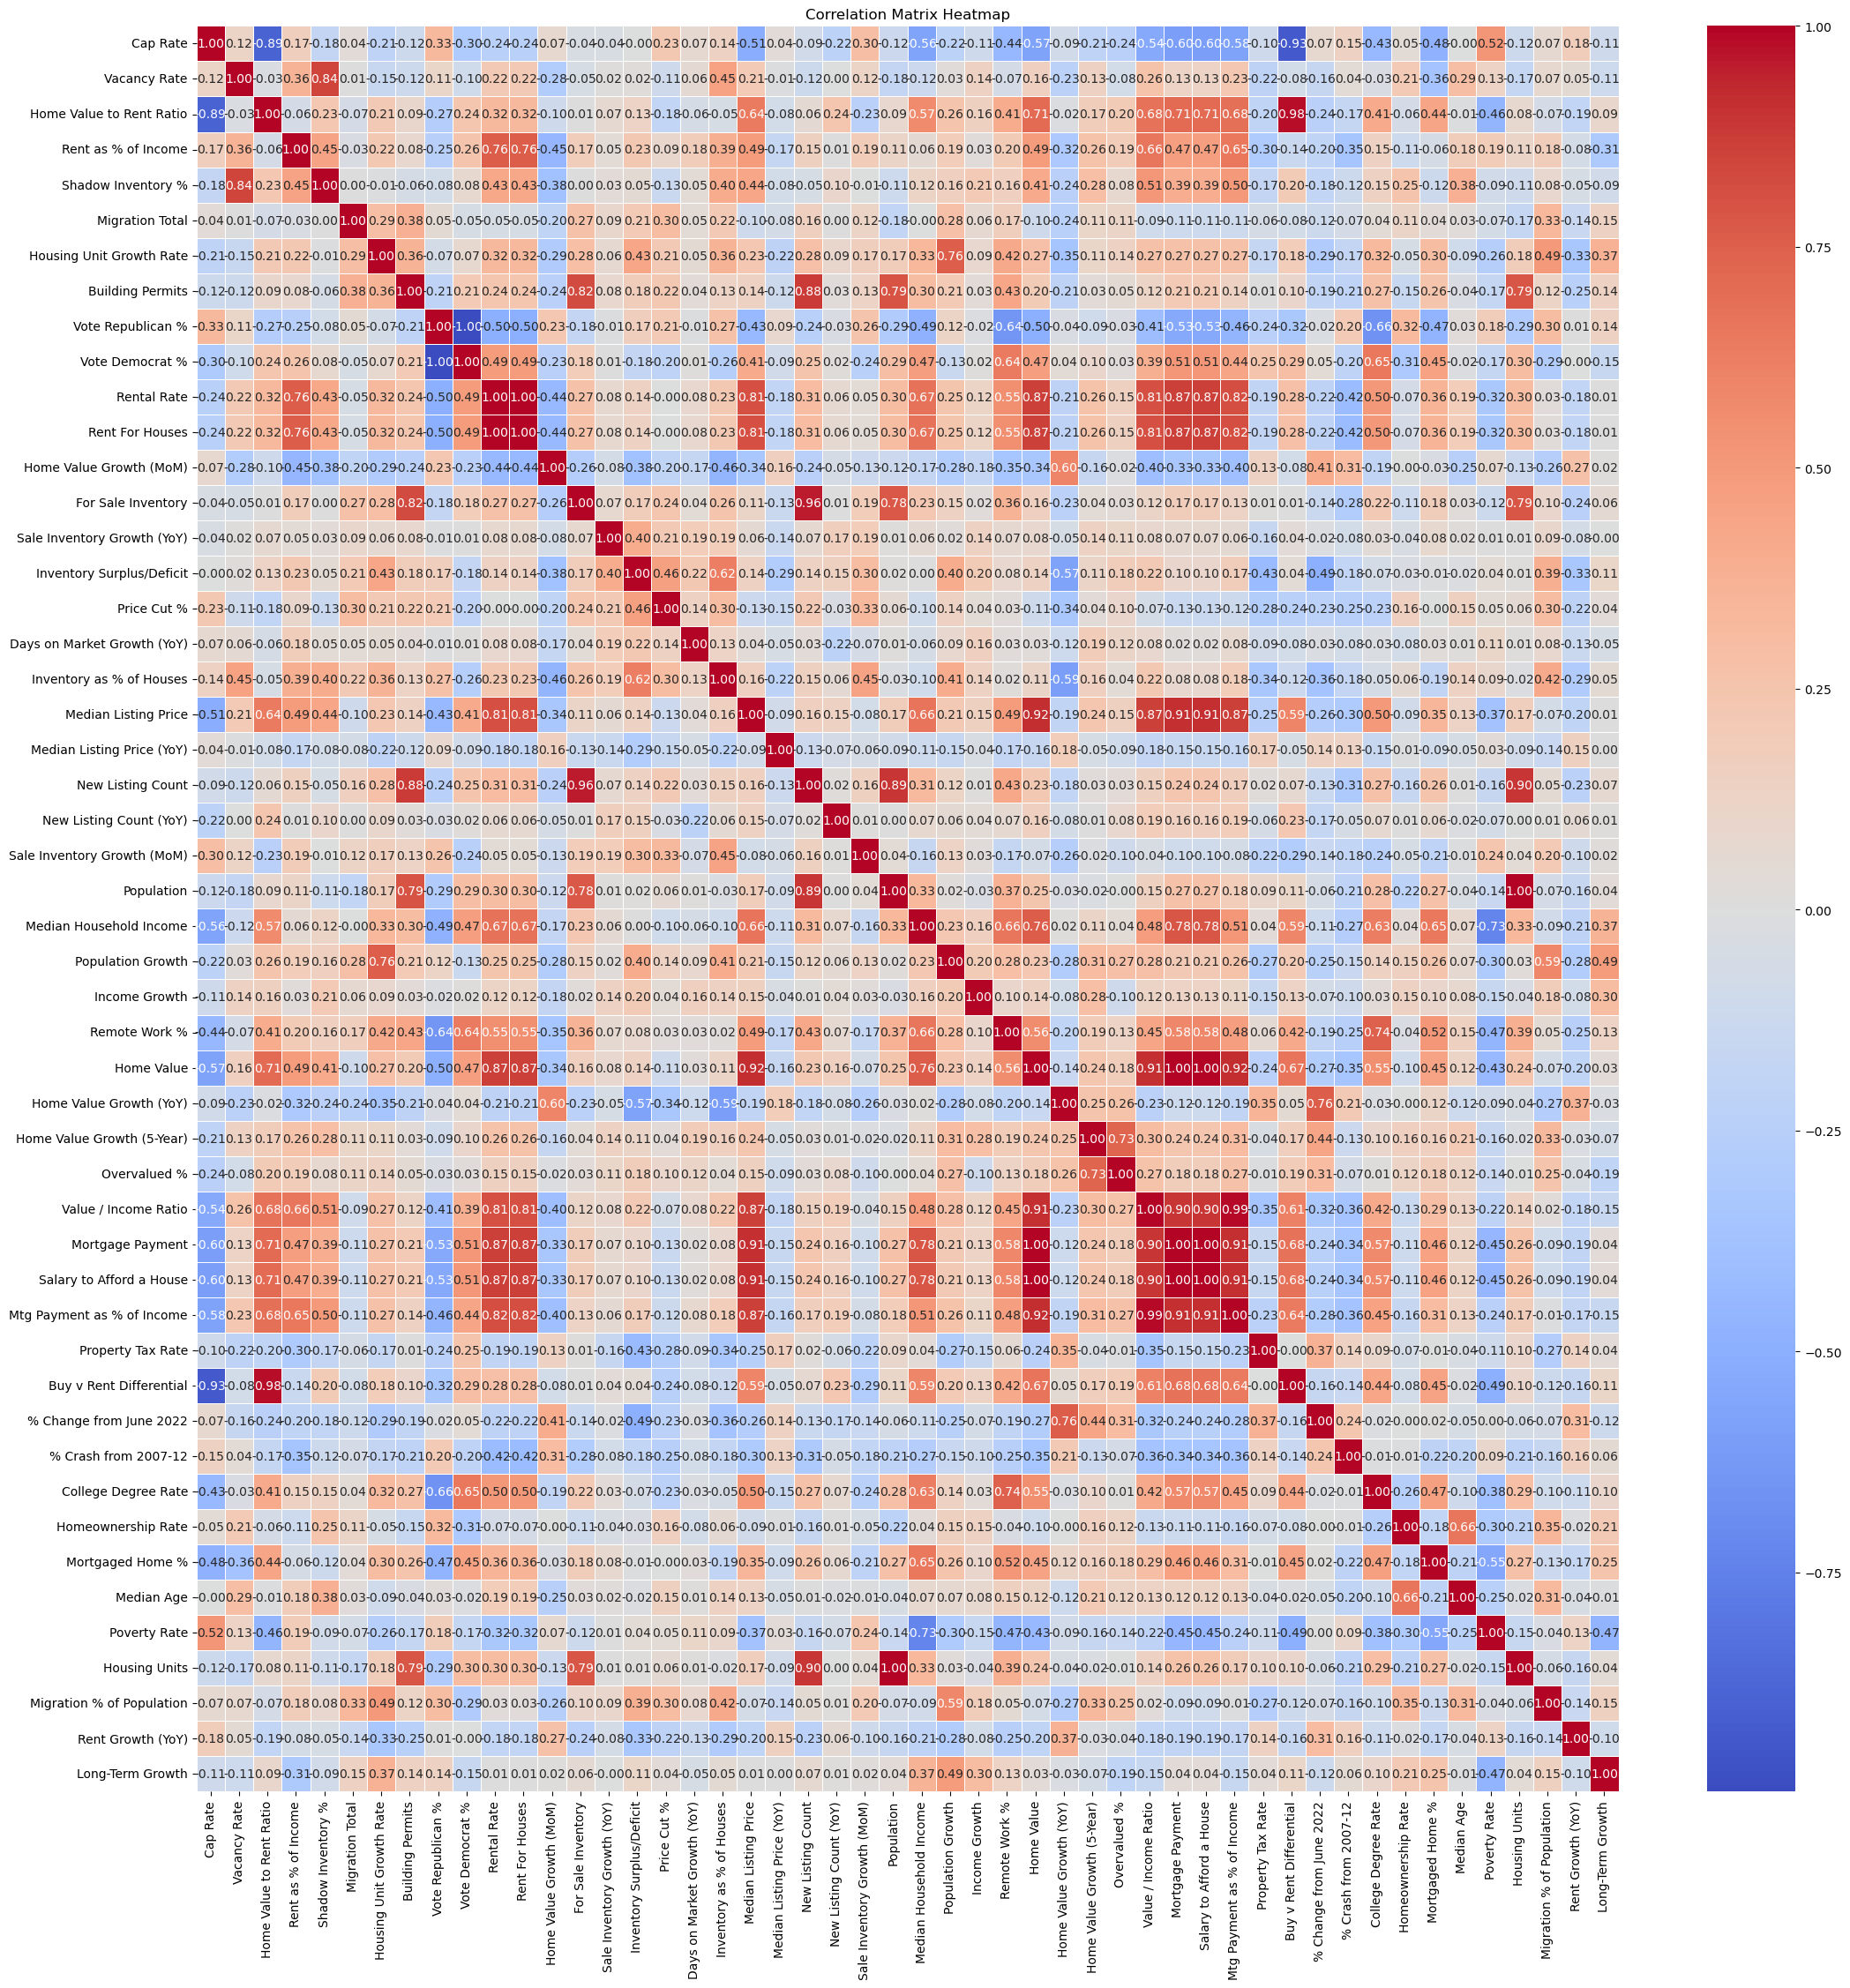

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (excluding non-numeric columns)
corr_matrix = df_filled.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(26, 26))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


In [25]:
## Rent Growth

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV

# Define the model
model = LinearRegression()

target = "Rent Growth (YoY)"
print(target)

# Use RFE to select the top features
selector = RFE(model, n_features_to_select=10)  # Keep top 10 features
X_selected = selector.fit_transform(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Get selected feature names
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[selector.support_]
print("Selected features:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)


# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

# Define Lasso model with cross-validation
lasso = LassoCV(cv=5, max_iter=5000).fit(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Select features with nonzero coefficients
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[lasso.coef_ != 0]
print("Selected features by Lasso:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"Lasso selected R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Lasso selected R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Lasso selected Mean Squared Error:", mse)



feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

Rent Growth (YoY)
Selected features: Index(['Cap Rate', 'Vacancy Rate', 'Shadow Inventory %',
       'Housing Unit Growth Rate', 'Home Value Growth (MoM)',
       'Inventory as % of Houses', 'Population Growth', 'Remote Work %',
       'Property Tax Rate', 'Migration % of Population'],
      dtype='object')
R²(train)Score: 0.4707
R²(test) Score: 0.3243
Mean Squared Error: 0.0003364829382776111
                     Feature  Coefficient
4    Home Value Growth (MoM)     1.624717
8          Property Tax Rate     0.644551
0                   Cap Rate     0.342982
9  Migration % of Population     0.312560
6          Population Growth     0.140179
1               Vacancy Rate     0.042404
2         Shadow Inventory %    -0.017838
7              Remote Work %    -0.031054
3   Housing Unit Growth Rate    -0.225949
5   Inventory as % of Houses    -1.337354
Selected features by Lasso: Index(['Migration Total', 'Building Permits', 'Median Listing Price',
       'Population', 'Median Household Inco

In [26]:
## Home Value Growth (YoY)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define the model
model = LinearRegression()

target = "Home Value Growth (YoY)"
print(target)

# Use RFE to select the top features
selector = RFE(model, n_features_to_select=10)  # Keep top 10 features
X_selected = selector.fit_transform(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Get selected feature names
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[selector.support_]
print("Selected features:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

# Define Lasso model with cross-validation
lasso = LassoCV(cv=5, max_iter=5000).fit(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Select features with nonzero coefficients
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[lasso.coef_ != 0]
print("Selected features by Lasso:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"Lasso selected R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Lasso selected R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Lasso selected Mean Squared Error:", mse)



feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

Home Value Growth (YoY)
Selected features: Index(['Home Value Growth (MoM)', 'Price Cut %', 'Inventory as % of Houses',
       'Remote Work %', 'Overvalued %', 'Mtg Payment as % of Income',
       'Property Tax Rate', '% Change from June 2022', '% Crash from 2007-12',
       'Migration % of Population'],
      dtype='object')
R²(train)Score: 0.8569
R²(test) Score: 0.8362
Mean Squared Error: 7.954032668141924e-05
                      Feature  Coefficient
0     Home Value Growth (MoM)     1.714116
6           Property Tax Rate     0.200903
7     % Change from June 2022     0.178302
4                Overvalued %     0.029558
5  Mtg Payment as % of Income     0.000734
8        % Crash from 2007-12    -0.020297
3               Remote Work %    -0.027263
1                 Price Cut %    -0.043778
9   Migration % of Population    -0.267409
2    Inventory as % of Houses    -1.312233
Selected features by Lasso: Index(['Migration Total', 'Building Permits', 'Median Listing Price',
       'Popul

In [74]:
## Home Value Growth (5-Year)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define the model
model = LinearRegression()

target = "Home Value Growth (5-Year)"
print(target)

# Use RFE to select the top features
selector = RFE(model, n_features_to_select=10)  # Keep top 10 features
X_selected = selector.fit_transform(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Get selected feature names
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[selector.support_]
print("Selected features:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

# Define Lasso model with cross-validation
lasso = LassoCV(cv=5, max_iter=5000).fit(df_dropped.drop(columns=[target, "Name"]), df_dropped[target])

# Select features with nonzero coefficients
selected_features = df_dropped.drop(columns=[target, "Name"]).columns[lasso.coef_ != 0]
print("Selected features by Lasso:", selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_dropped[selected_features], df_dropped[target], test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"Lasso selected R²(train)Score: {r2:.4f}")
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Lasso selected R²(test) Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print("Lasso selected Mean Squared Error:", mse)



feature_coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)

Home Value Growth (5-Year)
Selected features: Index(['Shadow Inventory %', 'Vote Republican %', 'Vote Democrat %',
       'Home Value Growth (MoM)', 'Income Growth', 'Home Value Growth (YoY)',
       'Overvalued %', 'Property Tax Rate', '% Change from June 2022',
       'Migration % of Population'],
      dtype='object')
R²(train)Score: 0.8150
R²(test) Score: 0.7219
Mean Squared Error: 0.004098072591393406
                     Feature  Coefficient
9  Migration % of Population     3.309502
8    % Change from June 2022     0.881378
6               Overvalued %     0.608728
4              Income Growth     0.479938
5    Home Value Growth (YoY)     0.461903
0         Shadow Inventory %     0.456547
2            Vote Democrat %    -0.734140
1          Vote Republican %    -0.787735
7          Property Tax Rate    -2.517458
3    Home Value Growth (MoM)    -7.807468
